In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import functions


In [3]:
#AAS index after cross validation
aas = {'A': 0.8356956599678218,
 'C': 0.5219207324456876,
 'E': 0.9868660417547442,
 'D': 0.9075983546378998,
 'G': 0.8003827946673535,
 'F': 0.5821934635876957,
 'I': 0.6790449304566072,
 'H': 0.8963977585570367,
 'K': 0.9259165090012061,
 'M': 0.6299964100098959,
 'L': 0.6546922237065839,
 'N': 0.8604957042204235,
 'Q': 0.7895650031998229,
 'P': 0.822104415564934,
 'S': 0.7442464390120463,
 'R': 0.771055152304471,
 'T': 0.8098670971949234,
 'W': 0.6386931894494416,
 'V': 0.7344952876686051,
 'Y': 0.6125581495225544}

#pET dataset
pET = pd.read_pickle('results/pET_complete.pkl.gz', compression='infer')
pET['Amino acid solubility index'] = pET['Protein'].apply(lambda x:np.mean(functions.solubility_score(x, aas)))


X = pET['Amino acid solubility index']
Y = pET['Solubility']
X2 = sm.add_constant(X)

logit = sm.Logit(Y, X2)
result = logit.fit()
result.summary()



/home/bikash/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.566906
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Solubility   No. Observations:                12216
Model:                          Logit   Df Residuals:                    12214
Method:                           MLE   Df Model:                            1
Date:                Sat, 07 Dec 2019   Pseudo R-squ.:                  0.1016
Time:                        12:30:18   Log-Likelihood:                -6925.3
converged:                       True   LL-Null:                       -7708.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -62.8379      1.816    -34.609      0.000     -66.397     -59.279
Amino acid solubility index    81.1496      2.322     34.953      0.000      76.599      85.700
===============================================================================================
"""

In [4]:
# estimate confidence interval for predicted probabilities

proba = result.predict(X2)
cov = result.cov_params()
gradient = (proba * (1 - proba) * X2.T).T # matrix of gradients for each observation
std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient.values])
c = 1.96 # multiplier for confidence interval
upper = np.maximum(0, np.minimum(1, proba + std_errors * c))
lower = np.maximum(0, np.minimum(1, proba - std_errors * c))



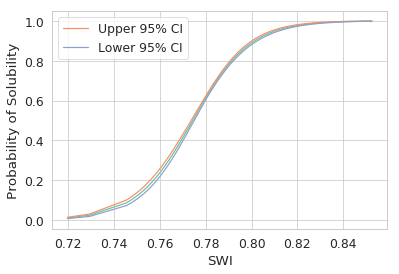

In [6]:
#plot fitted values with their CI

functions.sns.lineplot(X, proba)
functions.sns.lineplot(X, upper, label="Upper 95% CI")
functions.sns.lineplot(X, lower, label="Lower 95% CI")
#plt.fill_between(X, upper, lower, color='k', alpha=.15)



functions.plt.ylabel('Probability of Solubility')
functions.plt.xlabel('SWI')
# functions.sns.despine()
# functions.plt.savefig("figs/Logistic_regression_fit.pdf")
functions.plt.show()

functions.plt.clf()
functions.plt.close('all')

